In [ ]:
# Checkpoint 1

In [2]:
import pandas as pd
import numpy as np

In [3]:
# Load the companies data to companies data frame.
companies = pd.read_csv('companies.txt', sep='\t', encoding='iso-8859-1')

In [4]:
companies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66368 entries, 0 to 66367
Data columns (total 10 columns):
permalink        66368 non-null object
name             66367 non-null object
homepage_url     61310 non-null object
category_list    63220 non-null object
status           66368 non-null object
country_code     59410 non-null object
state_code       57821 non-null object
region           58338 non-null object
city             58340 non-null object
founded_at       51147 non-null object
dtypes: object(10)
memory usage: 5.1+ MB


In [5]:
companies.nunique()

permalink        66368
name             66102
homepage_url     61191
category_list    27296
status               4
country_code       137
state_code         311
region            1092
city              5111
founded_at        3978
dtype: int64

In [6]:
# Missing Data presentation.
companies.apply(lambda x: (100* (x.isnull().sum()/ len(companies.index))).round(2))

permalink         0.00
name              0.00
homepage_url      7.62
category_list     4.74
status            0.00
country_code     10.48
state_code       12.88
region           12.10
city             12.10
founded_at       22.93
dtype: float64

In [7]:
# Dropping the founded_at column because having the highest values of missing data.
companies.drop(labels=['founded_at'], inplace=True, axis=1)

In [8]:
# Load the given rounds2 data to rounds2 data frame.
rounds2 = pd.read_csv('rounds2.csv', encoding='iso-8859-1')

In [9]:
rounds2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114949 entries, 0 to 114948
Data columns (total 6 columns):
company_permalink          114949 non-null object
funding_round_permalink    114949 non-null object
funding_round_type         114949 non-null object
funding_round_code         31140 non-null object
funded_at                  114949 non-null object
raised_amount_usd          94959 non-null float64
dtypes: float64(1), object(5)
memory usage: 5.3+ MB


In [10]:
rounds2.nunique()

company_permalink           90247
funding_round_permalink    114949
funding_round_type             14
funding_round_code              8
funded_at                    5033
raised_amount_usd           22095
dtype: int64

In [11]:
rounds2.apply(lambda x: (100* (x.isnull().sum()/ len(rounds2.index))).round(2))

company_permalink           0.00
funding_round_permalink     0.00
funding_round_type          0.00
funding_round_code         72.91
funded_at                   0.00
raised_amount_usd          17.39
dtype: float64

In [12]:
# Dropping the funding_round_code column because having the highest values of missing data.
rounds2.drop(labels=['funding_round_code'], inplace=True, axis=1)

In [13]:
# Converting all 'company_permalink' data in to the upper case.
rounds2.company_permalink =  rounds2.company_permalink.map(lambda x: x.upper())

In [14]:
# unique companies are present in rounds2 data frame.
rounds2.company_permalink.nunique()

66370

In [15]:
# unique companies are present in companies data frame.
companies.permalink.nunique()

66368

In [16]:
#Any companies in the rounds2 file which are not present in the companies.
rounds2.company_permalink =  rounds2.company_permalink.map(lambda x: x.upper())
companies.permalink = companies.permalink.map(lambda x: x.upper())

In [17]:
companies[~companies.permalink.isin(rounds2.company_permalink)].count()

permalink        5
name             5
homepage_url     3
category_list    3
status           5
country_code     0
state_code       0
region           0
city             0
dtype: int64

In [18]:
rounds2[~rounds2.company_permalink.isin(companies.permalink)].count()

company_permalink          7
funding_round_permalink    7
funding_round_type         7
funded_at                  7
raised_amount_usd          1
dtype: int64

In [19]:
# Rename the column rounds2.companies_permalink to permalink column.
rounds2 = rounds2.rename(columns={'company_permalink':'permalink'})

In [20]:
# Merging the rounds2 and companies data frames to master_frame.
master_frame = rounds2.merge(companies, on='permalink', how='left')

In [21]:
# Oservations are present in the master_frame data frame.
len(master_frame.index)

114949

In [ ]:
# Checkpoint 2: 

In [23]:
groupedMean = master_frame.groupby(by='funding_round_type')['raised_amount_usd'].mean().round(1) 
groupedMean.loc[['venture','angel','seed','private_equity']]

funding_round_type
venture           11748949.1
angel               958694.5
seed                719818.0
private_equity    73308593.0
Name: raised_amount_usd, dtype: float64

In [24]:
# Which investment type is the most suitable for Spark Funds based on criteria of 5 to 15 million USD per investment round
groupedMean[((groupedMean > 5000000) & (groupedMean < 15000000))]

funding_round_type
venture    11748949.1
Name: raised_amount_usd, dtype: float64

In [ ]:
# Checkpoint 3: 

In [25]:
#Top nine countries which have received the highest total funding
countryWiseTotalRaisedAmount = master_frame.groupby(by='country_code')['raised_amount_usd'].sum()
top9 = pd.DataFrame(countryWiseTotalRaisedAmount.sort_values(ascending=False)[0:9])

In [26]:
top9

raised_amount_usd
country_code                   
USA                6.694821e+11
CHN                7.570357e+10
GBR                3.276705e+10
IND                2.768634e+10
CAN                1.842468e+10
RUS                1.127912e+10
DEU                1.001776e+10
ISR                9.713885e+09
FRA                9.059771e+09

In [ ]:
# Checkpoint 4: 

In [27]:
# Load the mapping data in to mapping data frame.
mapping = pd.read_csv('mapping.csv', encoding='iso-8859-1')

In [28]:
mapping.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 688 entries, 0 to 687
Data columns (total 10 columns):
category_list                              687 non-null object
Automotive & Sports                        688 non-null int64
Blanks                                     688 non-null int64
Cleantech / Semiconductors                 688 non-null int64
Entertainment                              688 non-null int64
Health                                     688 non-null int64
Manufacturing                              688 non-null int64
News, Search and Messaging                 688 non-null int64
Others                                     688 non-null int64
Social, Finance, Analytics, Advertising    688 non-null int64
dtypes: int64(9), object(1)
memory usage: 53.8+ KB


In [29]:
mapping.head()

category_list  Automotive & Sports  Blanks  Cleantech / Semiconductors  \
0            NaN                    0       1                           0   
1             3D                    0       0                           0   
2    3D Printing                    0       0                           0   
3  3D Technology                    0       0                           0   
4     Accounting                    0       0                           0   

   Entertainment  Health  Manufacturing  News, Search and Messaging  Others  \
0              0       0              0                           0       0   
1              0       0              1                           0       0   
2              0       0              1                           0       0   
3              0       0              1                           0       0   
4              0       0              0                           0       0   

   Social, Finance, Analytics, Advertising  
0                                        0  
1                                        0  
2                                        0  
3                                        0  
4                                        1

In [30]:
# Drop the missing values from mapping
mapping.dropna(inplace=True)

In [31]:
# Droping the Blanks column as we have no concrete data availabe for this column, that has any value
mapping.drop(labels='Blanks', inplace=True, axis=1)

In [32]:
# We can see na is replaced by 0 Ex- Analyst is represented as A0lyst in category_list column 
mapping['category_list'] = mapping['category_list'].str.replace('0', 'na')

In [33]:
# Before going further lets add a data frame of main sectors corresponding to its category_list
primary_to_main = {}
primary = []
mainSector = []
for row in mapping.index:
    for col in mapping:
        if str(mapping.loc[row,col]) == '1':
            primary.append(str(mapping.loc[row,'category_list']))
            mainSector.append(str(col))          
    continue          

In [34]:
primary_to_main['category_list'] = primary
primary_to_main['mainSector'] = mainSector

In [35]:
primaryToMain = pd.DataFrame(primary_to_main)

In [36]:
# Merged data frame with each primary sector mapped to its main sector
primaryToMain.head()

category_list                               mainSector
0                3D                            Manufacturing
1       3D Printing                            Manufacturing
2     3D Technology                            Manufacturing
3        Accounting  Social, Finance, Analytics, Advertising
4  Active Lifestyle                                   Health

In [37]:
# Extracting the primary sector of each category list from the category_list column
master_frame.category_list = master_frame.category_list.astype('str').apply(lambda x: x.split('|')[0])

In [ ]:
# Checkpoint 5: 

In [42]:
# Filtering on country_code
D1 =  master_frame[(master_frame['country_code'] == 'USA') & ((master_frame['raised_amount_usd'].astype('float') > 5000000) & (master_frame['raised_amount_usd'].astype('float') < 15000000))]
D2 =  master_frame[(master_frame['country_code'] == 'GBR') & ((master_frame['raised_amount_usd'].astype('float') > 5000000) & (master_frame['raised_amount_usd'].astype('float') < 15000000))]
D3 =  master_frame[(master_frame['country_code'] == 'IND') & ((master_frame['raised_amount_usd'].astype('float') > 5000000) & (master_frame['raised_amount_usd'].astype('float') < 15000000))]

In [44]:
D1 = D1.merge(primaryToMain, on='category_list', how='inner')
D2 = D2.merge(primaryToMain, on='category_list', how='inner')
D3 = D3.merge(primaryToMain, on='category_list', how='inner')

In [ ]:
# Grouped Data for D1
mainSectorCount = D1.groupby(by=['mainSector'])['permalink'].count().to_frame()
mainSectorRaisedAmount = D1.groupby(by=['mainSector'])['raised_amount_usd'].sum().to_frame()
mainSectorCount.reset_index(inplace=True)
mainSectorRaisedAmount.reset_index(inplace=True)
groupedDataD1 = mainSectorRaisedAmount.merge(mainSectorCount, on='mainSector')
D1 = D1.merge(groupedDataD1, on='mainSector')

In [ ]:
# Grouped Data for D2
mainSectorCount = D2.groupby(by=['mainSector'])['permalink'].count().to_frame()
mainSectorRaisedAmount = D2.groupby(by=['mainSector'])['raised_amount_usd'].sum().to_frame()
mainSectorCount.reset_index(inplace=True)
mainSectorRaisedAmount.reset_index(inplace=True)
groupedDataD2 = mainSectorRaisedAmount.merge(mainSectorCount, on='mainSector')
D2 = D2.merge(groupedDataD2, on='mainSector')

In [ ]:
# Grouped Data for D3
mainSectorCount = D3.groupby(by=['mainSector'])['permalink'].count().to_frame()
mainSectorRaisedAmount = D3.groupby(by=['mainSector'])['raised_amount_usd'].sum().to_frame()
mainSectorCount.reset_index(inplace=True)
mainSectorRaisedAmount.reset_index(inplace=True)
groupedDataD3 = mainSectorRaisedAmount.merge(mainSectorCount, on='mainSector')
D3 = D3.merge(groupedDataD3, on='mainSector')

In [ ]:
# Total number of investments (count)

In [809]:
groupedDataD1.permalink.sum()

9942

In [810]:
groupedDataD2.permalink.sum()

559

In [811]:
groupedDataD3.permalink.sum()

243

In [ ]:
# Total number of investments (USD)

In [812]:
groupedDataD1.raised_amount_usd.sum()

88638294664.0

In [813]:
groupedDataD2.raised_amount_usd.sum()

4875228300.0

In [814]:
groupedDataD3.raised_amount_usd.sum()

2174543602.0

In [ ]:
# Top sector (based on count of investments)

In [815]:
groupedDataD1.sort_values(by='permalink', ascending=False).head(3)

mainSector  raised_amount_usd  permalink
6                                   Others       2.173601e+10       2423
7  Social, Finance, Analytics, Advertising       1.939738e+10       2216
1               Cleantech / Semiconductors       1.780163e+10       1951

In [816]:
groupedDataD2.sort_values(by='permalink', ascending=False).head(3)

mainSector  raised_amount_usd  permalink
6                                   Others       1.123624e+09        129
1               Cleantech / Semiconductors       1.110140e+09        124
7  Social, Finance, Analytics, Advertising       9.744040e+08        118

In [817]:
groupedDataD3.sort_values(by='permalink', ascending=False).head(3)

mainSector  raised_amount_usd  permalink
6                                   Others        703409507.0         78
7  Social, Finance, Analytics, Advertising        385549550.0         45
5               News, Search and Messaging        368834545.0         41

In [ ]:
# Which company received the highest investment (top sector count-wise)

In [818]:
D1Other = D1[D1['mainSector'] == 'Others']
D1Other.sort_values(by='permalink_y', ascending=False)['permalink_x'].head(2)

2216     /ORGANIZATION/128-TECHNOLOGY
3826    /ORGANIZATION/SPECTRUM-BRIDGE
Name: permalink_x, dtype: object

In [819]:
D2Other = D2[D2['mainSector'] == 'Others']
D2Other.sort_values(by='permalink_y', ascending=False)['permalink_x'].head(2)

378          /ORGANIZATION/ACS-CLOTHING
443    /ORGANIZATION/ROOTSTOCK-SOFTWARE
Name: permalink_x, dtype: object

In [820]:
D3Other = D3[D3['mainSector'] == 'Others']
D3Other.sort_values(by='permalink_y', ascending=False)['permalink_x'].head(2)

23     /ORGANIZATION/21DIAMONDS-INDIA
72    /ORGANIZATION/AZURE-HOSPITALITY
Name: permalink_x, dtype: object

In [ ]:
# Checkpoint 6:

In [821]:
# Merge rounds2 and companies to get master_frame
master_frame = rounds2.merge(companies, on='permalink', how='left')

In [822]:
fundingTypeFrame = master_frame[master_frame['funding_round_type'].isin(['venture', 'seed', 'private_equity'])]

In [823]:
fundingTypeSum = fundingTypeFrame.groupby(by='funding_round_type')['raised_amount_usd'].sum().to_frame()
totalSumRaised = master_frame.raised_amount_usd.sum()
fundingTypeSum.reset_index(inplace=True)
fundingTypeSum['raised_amount_fraction'] = fundingTypeSum['raised_amount_usd'] / totalSumRaised

In [824]:
fundingTypeSum

funding_round_type  raised_amount_usd  raised_amount_fraction
0     private_equity       1.419254e+11                0.143341
1               seed       1.698986e+10                0.017159
2            venture       5.901262e+11                0.596012

In [825]:
fundingTypeMean = fundingTypeFrame.groupby(by='funding_round_type')['raised_amount_usd'].mean().to_frame()
fundingTypeMean.reset_index(inplace=True)

In [826]:
plot1DF = fundingTypeSum.merge(fundingTypeMean, on='funding_round_type', how='inner')

In [827]:
plot1DF.rename(columns={'raised_amount_usd_y':'raised_amount_mean'}, inplace=True)

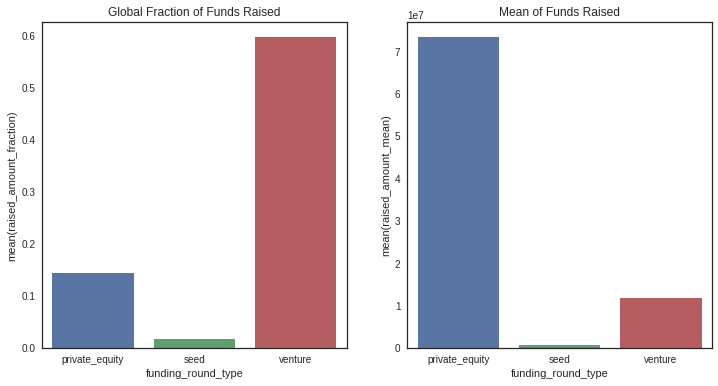

In [844]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="white")
# Create 2 subplots for mean and sum respectively

# increase figure size 
plt.figure(figsize=(12, 6))

# subplot 1: statistic=mean
plt.subplot(1, 2, 1)
sns.barplot(x='funding_round_type', y='raised_amount_fraction', data=plot1DF)
plt.title("Global Fraction of Funds Raised")

# subplot 2: statistic=sum
plt.subplot(1, 2, 2)
sns.barplot(x='funding_round_type', y='raised_amount_mean', data=plot1DF)
plt.title("Mean of Funds Raised")

plt.show()

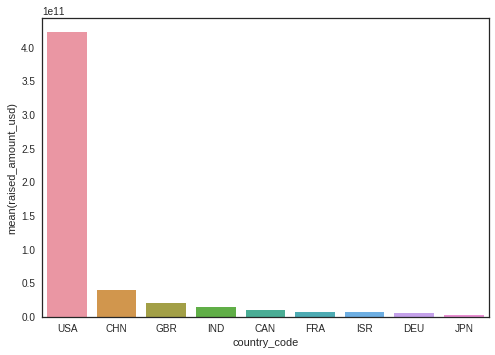

In [845]:
plot2df = pd.DataFrame(top9)
plot2df['country_code'] = plot2df.index
sns.barplot(y='raised_amount_usd',x='country_code',data=plot2df)
plt.show()

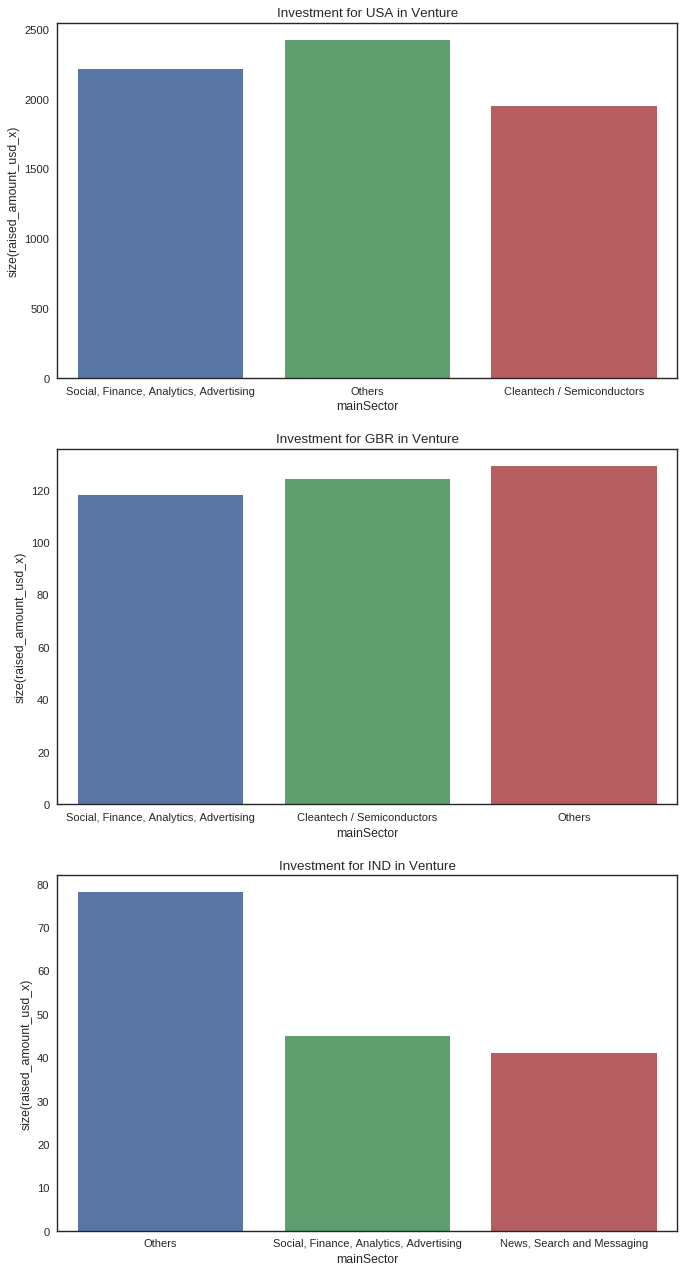

In [846]:
#Ploting the required in 3 subplots, one per country based upon top 3 sectors per country as obtained during Checkpoint 5
plt.figure(num=None, figsize=(10, 20), dpi=80, facecolor='w', edgecolor='k')

plt.subplot(3, 1, 1)
sns.barplot(x='mainSector',y='raised_amount_usd_x',data=D1[D1['mainSector'].isin(['Others', 'Social, Finance, Analytics, Advertising', 'Cleantech / Semiconductors'])], estimator=np.size)
plt.title('Investment for USA in Venture')

plt.subplot(3, 1, 2)
sns.barplot(x='mainSector',y='raised_amount_usd_x',data=D2[D2['mainSector'].isin(['Others','Cleantech / Semiconductors','Social, Finance, Analytics, Advertising'])], estimator=np.size)
plt.title('Investment for GBR in Venture')

plt.subplot(3, 1, 3)
sns.barplot(x='mainSector',y='raised_amount_usd_x',data=D3[D3['mainSector'].isin(['Others', 'Social, Finance, Analytics, Advertising', 'News, Search and Messaging'])], estimator=np.size)
plt.title('Investment for IND in Venture')
plt.show()